In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-27 16:35:15.370538: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-27 16:35:15.407424: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-27 16:35:15.938121: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################




df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/André - RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')
df_Lagostim_art = pd.DataFrame(df[['Ano','Lagostim_art']])

dados = df_Lagostim_art.replace(0,np.nan).dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1999,2000,2005,2008,2009,2010,2011,2012,2013,2014,2015,2016,2018,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Lagostim_art'].values
dados.head()

,Ano,Lagostim_art
26,1976,2.0
27,1977,3.0
47,1997,0.5
48,1998,0.5
51,2001,1.0


In [15]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [10]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=200, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagostim/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/200


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step - loss: 0.9682
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9376
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9150
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8943
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8722
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8513
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8324
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8153
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8015
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7908
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7837
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7776
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7732
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7702
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7678
Epoch 16/200
1/1 ━━━━━━━━━━━━━

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagostim/pesos pesca art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[2.499329  ]
 [2.480177  ]
 [2.4525366 ]
 [2.4236145 ]
 [2.389471  ]
 [2.346005  ]
 [2.2835279 ]
 [2.2041802 ]
 [2.118578  ]
 [1.9940307 ]
 [1.8423901 ]
 [1.6752264 ]
 [1.5050952 ]
 [1.3339554 ]
 [1.1621555 ]
 [0.9964262 ]
 [0.8408172 ]
 [0.70513326]
 [0.6040417 ]
 [0.6571392 ]
 [0.79417837]
 [0.37414795]
 [3.9325259 ]
 [3.3708541 ]
 [2.8502297 ]
 [2.3392067 ]
 [1.8509948 ]
 [1.3721915 ]
 [0.9549003 ]
 [0.6279756 ]
 [0.3577968 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


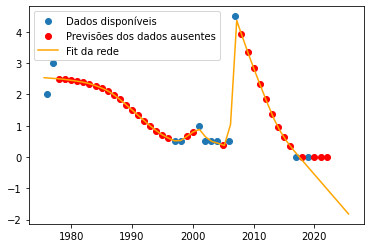

In [16]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

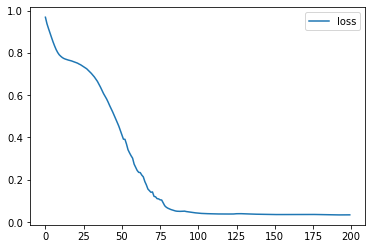

In [12]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [17]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Lagostim_art':prev_ausentes.flatten()})


df_previsoes.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagostim/Interpolação e Extrapolação Lagostim_art.xlsx')

df_previsoes

,Ano,Lagostim_art
0,1978,2.499329
1,1979,2.480177
2,1980,2.452537
3,1981,2.423615
4,1982,2.389471
5,1983,2.346005
6,1984,2.283528
7,1985,2.204180
8,1986,2.118578
9,1987,1.994031
